In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set the parameters to default
plt.rcParams.update(plt.rcParamsDefault)
#set the style back to default
plt.style.use('default')

In [2]:
#set the graphics parameters

large = 22; med = 16; small = 12

params = {"figure.figsize":(16,10),
         "axes.titlesize": large,
         "axes.labelsize": med,
         "legend.fontsize": med,
         "xtick.labelsize": med,
         "ytick.labelsize": med}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

In [3]:
#1.

#read the mpg.csv dataset

data = pd.read_csv("mpg(1).csv")

In [4]:
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
#data prep
datavis = data[['cty', 'manufacturer']].groupby('manufacturer').mean()
datavis.reset_index(inplace = True) #resets index back to numerical index instead of having manufacturer as index
                                    #inplace = True updates the index in place without the need to overwrite the dataframe
    
datavis.sort_values('cty', inplace = True)

In [6]:
datavis

,manufacturer,cty
8,lincoln,11.333333
7,land rover,11.500000
2,dodge,13.135135
9,mercury,13.250000
6,jeep,13.500000
3,ford,14.000000
1,chevrolet,15.000000
11,pontiac,17.000000
0,audi,17.611111
10,nissan,18.076923


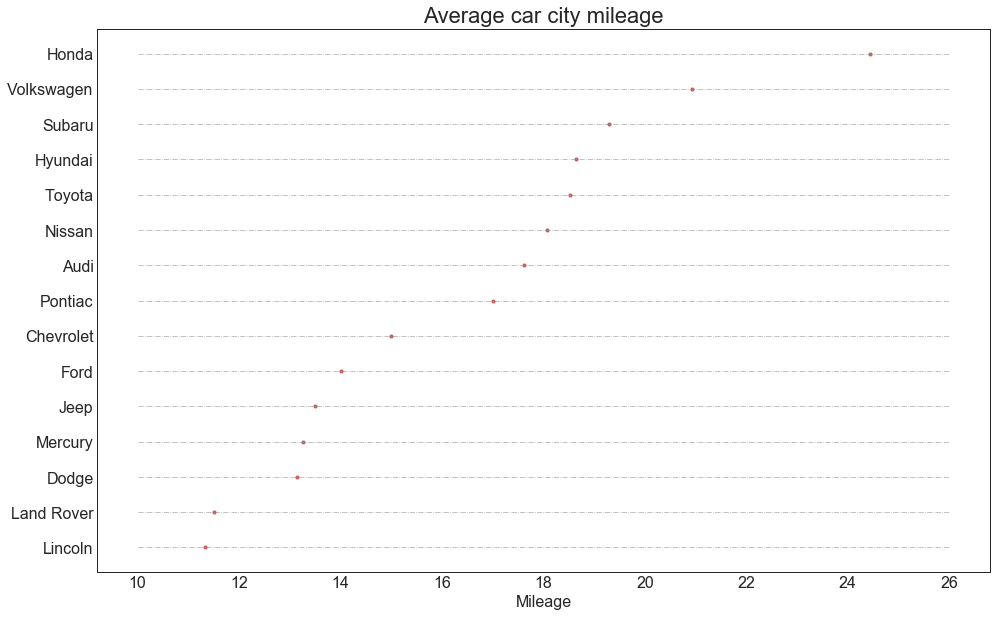

In [7]:
## data vis

plt.figure()

# add the dots
plt.scatter(x = datavis.cty, 
            y = datavis.manufacturer.str.title(), 
            color = 'firebrick',
            alpha = 0.6,
            s = 10) #markersize


# add the lines

ax = plt.gca()
ax.hlines(y = datavis.manufacturer.str.title(),
         xmin = 10,
         xmax = 26,
         linewidth = 0.8,
         linestyle = "-.",
         color = "grey",
         alpha = 0.6)

# str.title() capitalizes the manufacturer names... must change for both scatter y values and hlines y values

plt.title('Average car city mileage')
plt.xlabel('Mileage')

#get rid of the y-ticks
ax.yaxis.set_ticks_position('none')

plt.show()

In [8]:
#2.

#create a new column in the datavis dataset called 'cty_z' which is the z-score for 'cty' variable

#data prep

data['cty_z'] = (data['cty'] - data.cty.mean())/data.cty.std()

datavis = data[['cty_z', 'manufacturer']].\
                    groupby('manufacturer').\
                    mean().\
                    sort_values('cty_z').\
                    reset_index()

## create a color variable for the bars

datavis['col'] = ['red' if i < 0 else 'green' for i in datavis.cty_z]

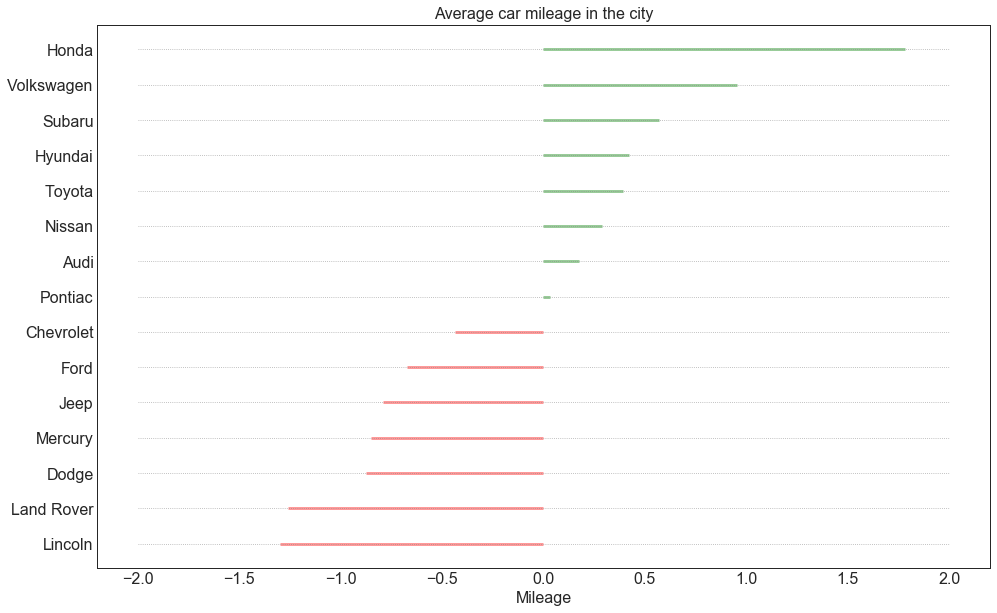

In [9]:
## data vis

plt.figure()

ax = plt.gca()

ax.hlines(y = datavis.manufacturer.str.title(),
         xmin = 0,
         xmax = datavis.cty_z,
         color = datavis.col,
         linewidth = 3,
         alpha = 0.4
         )

#add the lines

ax.hlines(y = datavis.manufacturer.str.title(),
         xmin = -2,
         xmax = 2,
         linewidth = 0.8,
         linestyle = ":",
         color = "grey",
         alpha = 0.7)

plt.title('Average car mileage in the city', fontsize = 16)
plt.xlabel('Mileage')
plt.show()

In [10]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

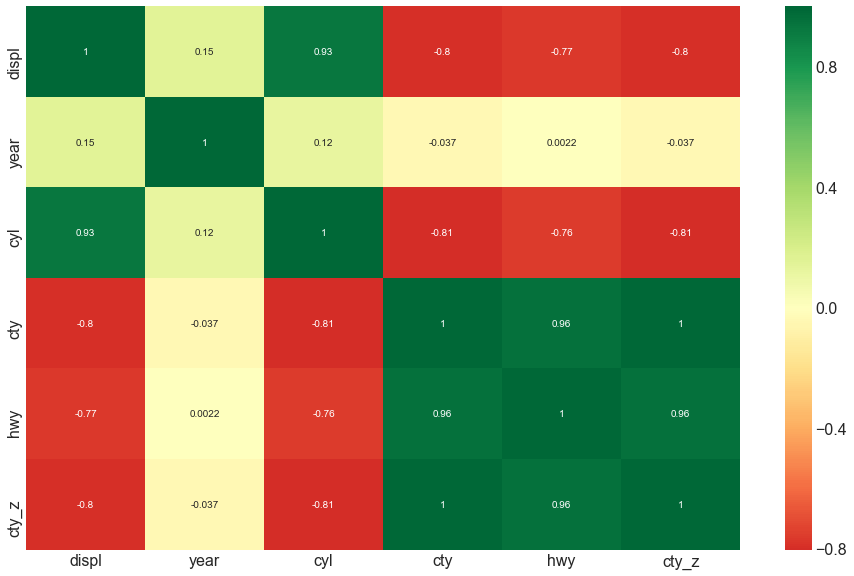

In [17]:
#3.
import seaborn as sns # for the correlogram graph

data.corr()

plt.figure()

sns.heatmap(data.corr(),
           cmap = 'RdYlGn',
           center = 0,
           annot = True)

plt.show()



<Figure size 1152x720 with 0 Axes>

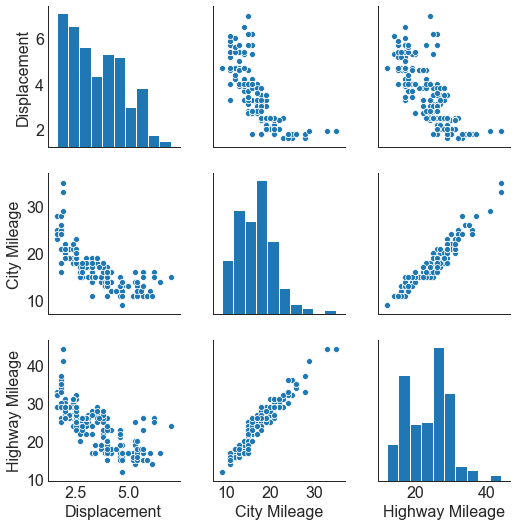

In [25]:
#4. 

datavis = data[['displ', 'cty', 'hwy']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage']

plt.figure()

sns.pairplot(datavis)

plt.show()

<Figure size 1152x720 with 0 Axes>

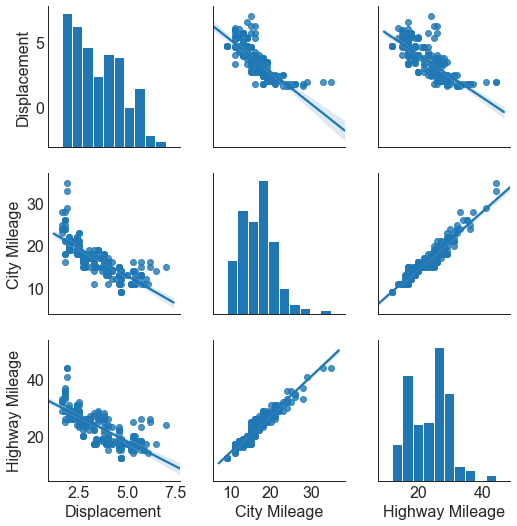

In [26]:
#5. 

datavis = data[['displ', 'cty', 'hwy']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage']

plt.figure()

sns.pairplot(datavis, kind = 'reg')

plt.show()

C:\Users\donny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\donny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1152x720 with 0 Axes>

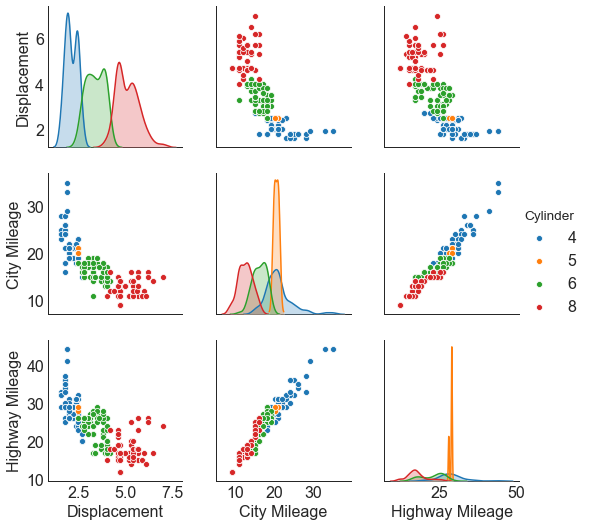

In [34]:
#6. 

datavis = data[['displ', 'cty', 'hwy', 'cyl']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage', 'Cylinder']

plt.figure()

sns.pairplot(datavis,
             x_vars = ['Displacement', 'City Mileage', 'Highway Mileage'],
            y_vars = ['Displacement', 'City Mileage', 'Highway Mileage'],
            hue = 'Cylinder')

plt.show()

In [ ]:
#7.

